In [1]:
import os, sys
import numpy as np
import pandas as pd
sys.path.append('../..')
from src import direcslist, load_image, raw_data_path, ImageQuant2
%matplotlib widget

In [2]:
basepath = raw_data_path + '/Imaging/Optogenetics'
paths = direcslist(basepath, 2)

imgs = [load_image(p + '/rfp_channel_flat.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

In [3]:
# Load reference profiles
cytbg = np.loadtxt('../../data/calibration_cyt.txt')
membg1 = np.loadtxt('../../data/calibration_mem1.txt')
membg2 = np.loadtxt('../../data/calibration_mem2.txt')
membg3 = np.loadtxt('../../data/calibration_mem3.txt')
membg4 = np.loadtxt('../../data/calibration_mem4.txt')
membg5 = np.loadtxt('../../data/calibration_mem5.txt')
membg6 = np.loadtxt('../../data/calibration_mem6.txt')

In [4]:
# Global calibration parameterrs
kwargs_dict = {'lr': 0.005, 'descent_steps': 600}

### Quantification 0
Naive - uses error function and gaussian

  0%|                                                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                          | 1/600 [00:00<06:06,  1.63it/s]

  2%|██▊                                                                                                                                       | 12/600 [00:00<00:27, 21.76it/s]

  3%|████▎                                                                                                                                     | 19/600 [00:00<00:18, 31.82it/s]

  5%|██████▋                                                                                                                                   | 29/600 [00:00<00:12, 46.50it/s]

  6%|████████▉                                                                                                                                 | 39/600 [00:01<00:09, 59.10it/s]

  8%|███████████▎                                                                                                                              | 49/600 [00:01<00:08, 68.18it/s]

 10%|█████████████▊                                                                                                                            | 60/600 [00:01<00:06, 78.31it/s]

 12%|████████████████▎                                                                                                                         | 71/600 [00:01<00:06, 85.30it/s]

 14%|██████████████████▊                                                                                                                       | 82/600 [00:01<00:05, 90.11it/s]

 15%|█████████████████████▏                                                                                                                    | 92/600 [00:01<00:05, 91.20it/s]

 17%|███████████████████████▎                                                                                                                 | 102/600 [00:01<00:05, 91.90it/s]

 19%|█████████████████████████▌                                                                                                               | 112/600 [00:01<00:05, 93.03it/s]

 20%|████████████████████████████                                                                                                             | 123/600 [00:01<00:04, 97.85it/s]

 22%|██████████████████████████████▌                                                                                                          | 134/600 [00:01<00:04, 99.60it/s]

 24%|█████████████████████████████████                                                                                                        | 145/600 [00:02<00:04, 96.77it/s]

 26%|███████████████████████████████████▍                                                                                                     | 155/600 [00:02<00:04, 95.43it/s]

 28%|█████████████████████████████████████▋                                                                                                   | 165/600 [00:02<00:04, 93.77it/s]

 29%|███████████████████████████████████████▉                                                                                                 | 175/600 [00:02<00:04, 91.31it/s]

 31%|██████████████████████████████████████████▍                                                                                              | 186/600 [00:02<00:04, 94.62it/s]

 33%|████████████████████████████████████████████▉                                                                                            | 197/600 [00:02<00:04, 97.84it/s]

 35%|███████████████████████████████████████████████▏                                                                                        | 208/600 [00:02<00:03, 100.66it/s]

 36%|█████████████████████████████████████████████████▋                                                                                      | 219/600 [00:02<00:03, 100.76it/s]

 38%|████████████████████████████████████████████████████▌                                                                                    | 230/600 [00:02<00:03, 99.21it/s]

 40%|██████████████████████████████████████████████████████▊                                                                                 | 242/600 [00:03<00:03, 102.36it/s]

 42%|█████████████████████████████████████████████████████████▎                                                                              | 253/600 [00:03<00:03, 102.80it/s]

 44%|███████████████████████████████████████████████████████████▊                                                                            | 264/600 [00:03<00:03, 103.55it/s]

 46%|██████████████████████████████████████████████████████████████▎                                                                         | 275/600 [00:03<00:03, 102.20it/s]

 48%|████████████████████████████████████████████████████████████████▊                                                                       | 286/600 [00:03<00:03, 101.11it/s]

 50%|███████████████████████████████████████████████████████████████████▎                                                                    | 297/600 [00:03<00:03, 100.88it/s]

 51%|█████████████████████████████████████████████████████████████████████▊                                                                  | 308/600 [00:03<00:02, 101.90it/s]

 53%|████████████████████████████████████████████████████████████████████████▊                                                                | 319/600 [00:03<00:02, 99.22it/s]

 55%|███████████████████████████████████████████████████████████████████████████                                                              | 329/600 [00:03<00:02, 98.41it/s]

 56%|█████████████████████████████████████████████████████████████████████████████▍                                                           | 339/600 [00:04<00:02, 98.85it/s]

 58%|███████████████████████████████████████████████████████████████████████████████▋                                                         | 349/600 [00:04<00:02, 98.09it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▉                                                       | 359/600 [00:04<00:02, 95.62it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████▎                                                    | 369/600 [00:04<00:02, 94.47it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████▌                                                  | 379/600 [00:04<00:02, 93.11it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████▊                                                | 389/600 [00:04<00:02, 91.89it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████▎                                             | 400/600 [00:04<00:02, 96.78it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 411/600 [00:04<00:01, 97.90it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 421/600 [00:04<00:01, 97.65it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 433/600 [00:05<00:01, 101.26it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 444/600 [00:05<00:01, 103.23it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 455/600 [00:05<00:01, 104.89it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 466/600 [00:05<00:01, 106.36it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 477/600 [00:05<00:01, 106.15it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 488/600 [00:05<00:01, 98.52it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 499/600 [00:05<00:01, 100.21it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 510/600 [00:05<00:00, 102.91it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 521/600 [00:05<00:00, 102.47it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 532/600 [00:05<00:00, 102.85it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 543/600 [00:06<00:00, 101.10it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 554/600 [00:06<00:00, 102.34it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 566/600 [00:06<00:00, 105.19it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 578/600 [00:06<00:00, 106.93it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 590/600 [00:06<00:00, 109.05it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:06<00:00, 90.69it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

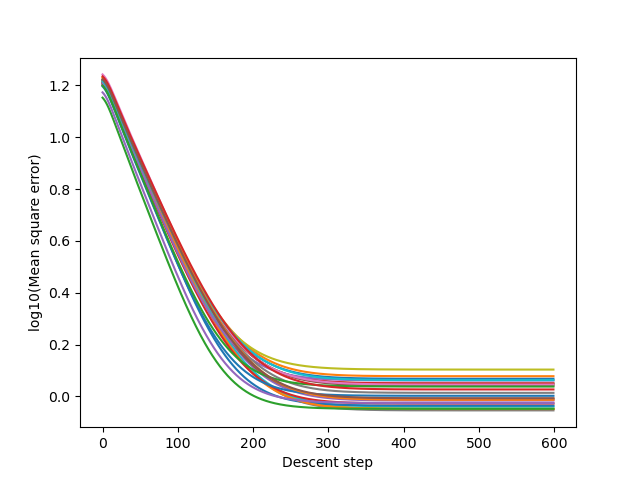

In [5]:
iq0 = ImageQuant2(img=imgs, roi=rois)
iq0.quantify(**kwargs_dict)
res0 = iq0.compile_res()
iq0.plot_losses(log=True)

### Quantification 1

  0%|                                                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                          | 1/600 [00:00<02:59,  3.33it/s]

  2%|██▉                                                                                                                                       | 13/600 [00:00<00:14, 40.34it/s]

  4%|█████▊                                                                                                                                    | 25/600 [00:00<00:09, 63.64it/s]

  6%|████████▎                                                                                                                                 | 36/600 [00:00<00:07, 76.70it/s]

  8%|██████████▊                                                                                                                               | 47/600 [00:00<00:06, 86.52it/s]

 10%|█████████████▌                                                                                                                            | 59/600 [00:00<00:05, 94.26it/s]

 12%|████████████████▎                                                                                                                         | 71/600 [00:00<00:05, 98.92it/s]

 14%|██████████████████▉                                                                                                                      | 83/600 [00:01<00:05, 103.22it/s]

 16%|█████████████████████▍                                                                                                                   | 94/600 [00:01<00:04, 104.29it/s]

 18%|███████████████████████▊                                                                                                                | 105/600 [00:01<00:04, 105.46it/s]

 20%|██████████████████████████▌                                                                                                             | 117/600 [00:01<00:04, 107.20it/s]

 21%|█████████████████████████████                                                                                                           | 128/600 [00:01<00:04, 107.71it/s]

 23%|███████████████████████████████▌                                                                                                        | 139/600 [00:01<00:04, 107.59it/s]

 25%|██████████████████████████████████▏                                                                                                     | 151/600 [00:01<00:04, 108.78it/s]

 27%|████████████████████████████████████▋                                                                                                   | 162/600 [00:01<00:04, 109.08it/s]

 29%|███████████████████████████████████████▏                                                                                                | 173/600 [00:01<00:03, 109.16it/s]

 31%|█████████████████████████████████████████▉                                                                                              | 185/600 [00:01<00:03, 109.93it/s]

 33%|████████████████████████████████████████████▋                                                                                           | 197/600 [00:02<00:03, 110.10it/s]

 35%|███████████████████████████████████████████████▎                                                                                        | 209/600 [00:02<00:03, 109.15it/s]

 37%|██████████████████████████████████████████████████                                                                                      | 221/600 [00:02<00:03, 109.57it/s]

 39%|████████████████████████████████████████████████████▌                                                                                   | 232/600 [00:02<00:03, 102.82it/s]

 40%|███████████████████████████████████████████████████████                                                                                 | 243/600 [00:02<00:03, 104.32it/s]

 42%|█████████████████████████████████████████████████████████▌                                                                              | 254/600 [00:02<00:03, 105.25it/s]

 44%|████████████████████████████████████████████████████████████▎                                                                           | 266/600 [00:02<00:03, 106.78it/s]

 46%|██████████████████████████████████████████████████████████████▊                                                                         | 277/600 [00:02<00:03, 107.31it/s]

 48%|█████████████████████████████████████████████████████████████████▎                                                                      | 288/600 [00:02<00:02, 108.05it/s]

 50%|███████████████████████████████████████████████████████████████████▊                                                                    | 299/600 [00:03<00:02, 107.62it/s]

 52%|██████████████████████████████████████████████████████████████████████▍                                                                 | 311/600 [00:03<00:02, 108.36it/s]

 54%|████████████████████████████████████████████████████████████████████████▉                                                               | 322/600 [00:03<00:02, 108.17it/s]

 56%|███████████████████████████████████████████████████████████████████████████▍                                                            | 333/600 [00:03<00:02, 108.23it/s]

 57%|██████████████████████████████████████████████████████████████████████████████▏                                                         | 345/600 [00:03<00:02, 109.51it/s]

 59%|████████████████████████████████████████████████████████████████████████████████▋                                                       | 356/600 [00:03<00:02, 109.47it/s]

 61%|███████████████████████████████████████████████████████████████████████████████████▏                                                    | 367/600 [00:03<00:02, 109.55it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▋                                                  | 378/600 [00:03<00:02, 109.49it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████▍                                               | 390/600 [00:03<00:01, 109.86it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████▉                                             | 401/600 [00:03<00:01, 109.86it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 412/600 [00:04<00:01, 109.21it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████                                        | 424/600 [00:04<00:01, 109.59it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 435/600 [00:04<00:01, 109.63it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 446/600 [00:04<00:01, 109.23it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 457/600 [00:04<00:01, 109.12it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 468/600 [00:04<00:01, 101.29it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 479/600 [00:04<00:01, 101.19it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 490/600 [00:04<00:01, 103.46it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 503/600 [00:04<00:00, 109.15it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 516/600 [00:05<00:00, 113.07it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 528/600 [00:05<00:00, 110.47it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 540/600 [00:05<00:00, 109.61it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 552/600 [00:05<00:00, 109.92it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 564/600 [00:05<00:00, 110.31it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 576/600 [00:05<00:00, 109.73it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 588/600 [00:05<00:00, 110.22it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:05<00:00, 110.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:05<00:00, 103.33it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

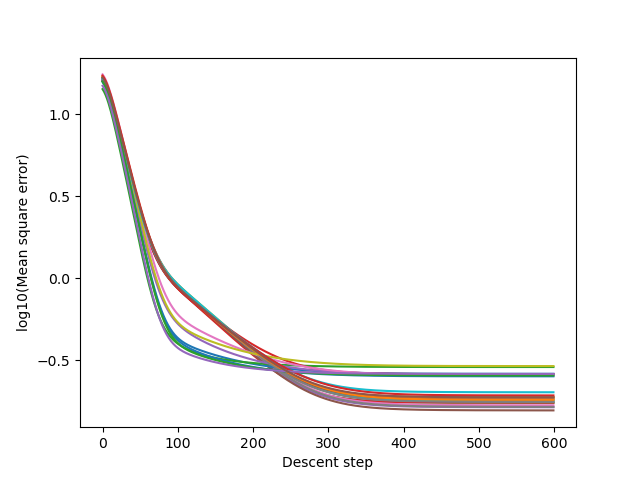

In [6]:
iq1 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg1)
iq1.quantify(**kwargs_dict)
res1 = iq1.compile_res()
iq1.plot_losses(log=True)

### Quantification 2

  0%|                                                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                          | 1/600 [00:00<02:56,  3.40it/s]

  2%|██▉                                                                                                                                       | 13/600 [00:00<00:14, 40.87it/s]

  4%|█████▊                                                                                                                                    | 25/600 [00:00<00:08, 64.33it/s]

  6%|████████▎                                                                                                                                 | 36/600 [00:00<00:07, 78.14it/s]

  8%|██████████▊                                                                                                                               | 47/600 [00:00<00:06, 87.65it/s]

 10%|█████████████▌                                                                                                                            | 59/600 [00:00<00:05, 95.00it/s]

 12%|████████████████▏                                                                                                                        | 71/600 [00:00<00:05, 100.39it/s]

 14%|██████████████████▋                                                                                                                      | 82/600 [00:01<00:05, 101.90it/s]

 16%|█████████████████████▏                                                                                                                   | 93/600 [00:01<00:04, 103.11it/s]

 17%|███████████████████████▌                                                                                                                | 104/600 [00:01<00:04, 105.03it/s]

 19%|██████████████████████████▎                                                                                                             | 116/600 [00:01<00:04, 107.37it/s]

 21%|█████████████████████████████                                                                                                           | 128/600 [00:01<00:04, 108.30it/s]

 23%|███████████████████████████████▋                                                                                                        | 140/600 [00:01<00:04, 109.94it/s]

 25%|██████████████████████████████████▍                                                                                                     | 152/600 [00:01<00:04, 105.99it/s]

 27%|████████████████████████████████████▉                                                                                                   | 163/600 [00:01<00:04, 103.00it/s]

 29%|███████████████████████████████████████▉                                                                                                | 176/600 [00:01<00:03, 108.94it/s]

 31%|██████████████████████████████████████████▌                                                                                             | 188/600 [00:02<00:03, 109.70it/s]

 33%|█████████████████████████████████████████████▎                                                                                          | 200/600 [00:02<00:03, 110.10it/s]

 35%|████████████████████████████████████████████████                                                                                        | 212/600 [00:02<00:03, 109.44it/s]

 37%|██████████████████████████████████████████████████▊                                                                                     | 224/600 [00:02<00:03, 110.02it/s]

 39%|█████████████████████████████████████████████████████▍                                                                                  | 236/600 [00:02<00:03, 111.18it/s]

 41%|████████████████████████████████████████████████████████▏                                                                               | 248/600 [00:02<00:03, 110.90it/s]

 43%|██████████████████████████████████████████████████████████▉                                                                             | 260/600 [00:02<00:03, 108.76it/s]

 45%|█████████████████████████████████████████████████████████████▍                                                                          | 271/600 [00:02<00:03, 108.31it/s]

 47%|███████████████████████████████████████████████████████████████▉                                                                        | 282/600 [00:02<00:02, 108.64it/s]

 49%|██████████████████████████████████████████████████████████████████▋                                                                     | 294/600 [00:02<00:02, 109.88it/s]

 51%|█████████████████████████████████████████████████████████████████████▎                                                                  | 306/600 [00:03<00:02, 110.52it/s]

 53%|████████████████████████████████████████████████████████████████████████                                                                | 318/600 [00:03<00:02, 109.18it/s]

 55%|██████████████████████████████████████████████████████████████████████████▌                                                             | 329/600 [00:03<00:02, 105.45it/s]

 57%|█████████████████████████████████████████████████████████████████████████████                                                           | 340/600 [00:03<00:02, 100.91it/s]

 59%|███████████████████████████████████████████████████████████████████████████████▊                                                        | 352/600 [00:03<00:02, 104.11it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████▌                                                     | 364/600 [00:03<00:02, 105.78it/s]

 62%|█████████████████████████████████████████████████████████████████████████████████████                                                   | 375/600 [00:03<00:02, 106.06it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████▍                                                | 386/600 [00:03<00:02, 106.71it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████▏                                             | 398/600 [00:03<00:01, 109.03it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 409/600 [00:04<00:01, 101.36it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 420/600 [00:04<00:01, 101.12it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 431/600 [00:04<00:01, 102.95it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 442/600 [00:04<00:01, 104.60it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 454/600 [00:04<00:01, 106.42it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 466/600 [00:04<00:01, 108.48it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 477/600 [00:04<00:01, 106.72it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 488/600 [00:04<00:01, 105.20it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 500/600 [00:04<00:00, 107.24it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 511/600 [00:05<00:00, 107.07it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 524/600 [00:05<00:00, 111.66it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 537/600 [00:05<00:00, 114.61it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 549/600 [00:05<00:00, 113.69it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 561/600 [00:05<00:00, 112.32it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 573/600 [00:05<00:00, 111.93it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 585/600 [00:05<00:00, 110.67it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 597/600 [00:05<00:00, 111.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:05<00:00, 103.23it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

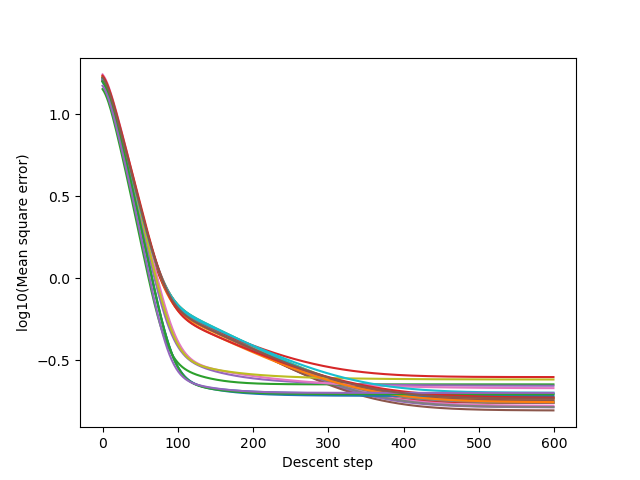

In [7]:
iq2 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg2)
iq2.quantify(**kwargs_dict)
res2 = iq2.compile_res()
iq2.plot_losses(log=True)

### Quantification 3

  0%|                                                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                          | 1/600 [00:00<03:01,  3.30it/s]

  2%|██▉                                                                                                                                       | 13/600 [00:00<00:14, 39.63it/s]

  4%|█████▌                                                                                                                                    | 24/600 [00:00<00:09, 61.01it/s]

  6%|████████▎                                                                                                                                 | 36/600 [00:00<00:07, 77.29it/s]

  8%|██████████▊                                                                                                                               | 47/600 [00:00<00:06, 85.48it/s]

 10%|█████████████▎                                                                                                                            | 58/600 [00:00<00:05, 91.90it/s]

 12%|███████████████▊                                                                                                                          | 69/600 [00:00<00:05, 97.09it/s]

 14%|██████████████████▍                                                                                                                      | 81/600 [00:01<00:05, 101.40it/s]

 15%|█████████████████████                                                                                                                    | 92/600 [00:01<00:04, 103.57it/s]

 17%|███████████████████████▎                                                                                                                | 103/600 [00:01<00:04, 104.52it/s]

 19%|█████████████████████████▊                                                                                                              | 114/600 [00:01<00:04, 105.34it/s]

 21%|████████████████████████████▎                                                                                                           | 125/600 [00:01<00:04, 106.65it/s]

 23%|██████████████████████████████▊                                                                                                         | 136/600 [00:01<00:04, 107.38it/s]

 25%|█████████████████████████████████▌                                                                                                      | 148/600 [00:01<00:04, 108.49it/s]

 26%|████████████████████████████████████                                                                                                    | 159/600 [00:01<00:04, 107.16it/s]

 28%|██████████████████████████████████████▊                                                                                                 | 171/600 [00:01<00:03, 109.92it/s]

 30%|█████████████████████████████████████████▍                                                                                              | 183/600 [00:01<00:03, 104.95it/s]

 32%|███████████████████████████████████████████▉                                                                                            | 194/600 [00:02<00:03, 104.11it/s]

 34%|██████████████████████████████████████████████▍                                                                                         | 205/600 [00:02<00:03, 105.55it/s]

 36%|████████████████████████████████████████████████▉                                                                                       | 216/600 [00:02<00:03, 106.36it/s]

 38%|███████████████████████████████████████████████████▍                                                                                    | 227/600 [00:02<00:03, 103.71it/s]

 40%|█████████████████████████████████████████████████████▉                                                                                  | 238/600 [00:02<00:03, 103.92it/s]

 42%|████████████████████████████████████████████████████████▍                                                                               | 249/600 [00:02<00:03, 103.50it/s]

 43%|██████████████████████████████████████████████████████████▉                                                                             | 260/600 [00:02<00:03, 102.29it/s]

 45%|█████████████████████████████████████████████████████████████▍                                                                          | 271/600 [00:02<00:03, 101.59it/s]

 47%|███████████████████████████████████████████████████████████████▉                                                                        | 282/600 [00:02<00:03, 101.46it/s]

 49%|██████████████████████████████████████████████████████████████████▋                                                                     | 294/600 [00:03<00:02, 106.39it/s]

 51%|█████████████████████████████████████████████████████████████████████▌                                                                  | 307/600 [00:03<00:02, 110.64it/s]

 53%|████████████████████████████████████████████████████████████████████████▎                                                               | 319/600 [00:03<00:02, 109.14it/s]

 55%|██████████████████████████████████████████████████████████████████████████▊                                                             | 330/600 [00:03<00:02, 106.56it/s]

 57%|█████████████████████████████████████████████████████████████████████████████▎                                                          | 341/600 [00:03<00:02, 107.41it/s]

 59%|███████████████████████████████████████████████████████████████████████████████▊                                                        | 352/600 [00:03<00:02, 107.84it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████▌                                                     | 364/600 [00:03<00:02, 108.63it/s]

 62%|█████████████████████████████████████████████████████████████████████████████████████                                                   | 375/600 [00:03<00:02, 108.53it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████▍                                                | 386/600 [00:03<00:01, 108.12it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████████▏                                             | 398/600 [00:04<00:01, 108.90it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 409/600 [00:04<00:01, 108.75it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 421/600 [00:04<00:01, 108.11it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 432/600 [00:04<00:01, 107.54it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 443/600 [00:04<00:01, 107.34it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 454/600 [00:04<00:01, 107.54it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 466/600 [00:04<00:01, 108.97it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 478/600 [00:04<00:01, 110.00it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 489/600 [00:04<00:01, 108.85it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 501/600 [00:04<00:00, 109.56it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 512/600 [00:05<00:00, 109.23it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 523/600 [00:05<00:00, 108.86it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 535/600 [00:05<00:00, 109.73it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 546/600 [00:05<00:00, 101.60it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 557/600 [00:05<00:00, 103.68it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 568/600 [00:05<00:00, 105.12it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 579/600 [00:05<00:00, 106.49it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 590/600 [00:05<00:00, 107.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:05<00:00, 101.89it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

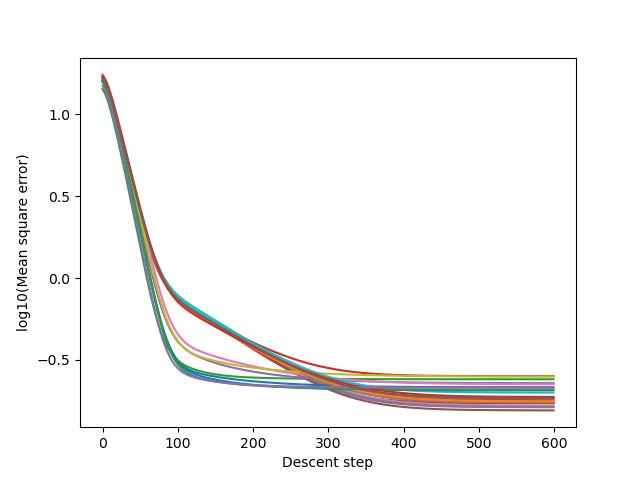

In [8]:
iq3 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg3)
iq3.quantify(**kwargs_dict)
res3 = iq3.compile_res()
iq3.plot_losses(log=True)

### Quantification 4

  0%|                                                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                          | 1/600 [00:00<02:57,  3.38it/s]

  2%|██▊                                                                                                                                       | 12/600 [00:00<00:15, 38.09it/s]

  4%|█████▎                                                                                                                                    | 23/600 [00:00<00:09, 60.45it/s]

  6%|███████▌                                                                                                                                  | 33/600 [00:00<00:08, 70.86it/s]

  7%|██████████                                                                                                                                | 44/600 [00:00<00:06, 82.42it/s]

  9%|████████████▉                                                                                                                             | 56/600 [00:00<00:05, 91.65it/s]

 11%|███████████████▍                                                                                                                          | 67/600 [00:00<00:05, 95.99it/s]

 13%|█████████████████▉                                                                                                                        | 78/600 [00:01<00:05, 98.54it/s]

 15%|████████████████████▎                                                                                                                    | 89/600 [00:01<00:05, 100.84it/s]

 17%|██████████████████████▋                                                                                                                 | 100/600 [00:01<00:04, 102.63it/s]

 18%|█████████████████████████▏                                                                                                              | 111/600 [00:01<00:04, 103.93it/s]

 20%|███████████████████████████▋                                                                                                            | 122/600 [00:01<00:04, 104.45it/s]

 22%|██████████████████████████████▏                                                                                                         | 133/600 [00:01<00:04, 105.77it/s]

 24%|████████████████████████████████▊                                                                                                       | 145/600 [00:01<00:04, 107.61it/s]

 26%|███████████████████████████████████▎                                                                                                    | 156/600 [00:01<00:04, 107.46it/s]

 28%|██████████████████████████████████████                                                                                                  | 168/600 [00:01<00:03, 109.41it/s]

 30%|████████████████████████████████████████▊                                                                                               | 180/600 [00:01<00:03, 110.37it/s]

 32%|███████████████████████████████████████████▌                                                                                            | 192/600 [00:02<00:03, 108.28it/s]

 34%|██████████████████████████████████████████████                                                                                          | 203/600 [00:02<00:03, 107.17it/s]

 36%|████████████████████████████████████████████████▌                                                                                       | 214/600 [00:02<00:03, 107.24it/s]

 38%|███████████████████████████████████████████████████                                                                                     | 225/600 [00:02<00:03, 105.58it/s]

 39%|█████████████████████████████████████████████████████▍                                                                                  | 236/600 [00:02<00:03, 106.21it/s]

 41%|███████████████████████████████████████████████████████▉                                                                                | 247/600 [00:02<00:03, 106.82it/s]

 43%|██████████████████████████████████████████████████████████▋                                                                             | 259/600 [00:02<00:03, 107.99it/s]

 45%|█████████████████████████████████████████████████████████████▍                                                                          | 271/600 [00:02<00:03, 108.79it/s]

 47%|███████████████████████████████████████████████████████████████▉                                                                        | 282/600 [00:02<00:02, 108.56it/s]

 49%|██████████████████████████████████████████████████████████████████▍                                                                     | 293/600 [00:03<00:02, 108.55it/s]

 51%|████████████████████████████████████████████████████████████████████▉                                                                   | 304/600 [00:03<00:02, 108.36it/s]

 53%|███████████████████████████████████████████████████████████████████████▋                                                                | 316/600 [00:03<00:02, 108.80it/s]

 55%|██████████████████████████████████████████████████████████████████████████                                                              | 327/600 [00:03<00:02, 108.20it/s]

 56%|████████████████████████████████████████████████████████████████████████████▌                                                           | 338/600 [00:03<00:02, 107.39it/s]

 58%|███████████████████████████████████████████████████████████████████████████████                                                         | 349/600 [00:03<00:02, 107.67it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▊                                                      | 361/600 [00:03<00:02, 108.63it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████▎                                                   | 372/600 [00:03<00:02, 108.37it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████                                                 | 384/600 [00:03<00:01, 109.31it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████▌                                              | 395/600 [00:03<00:01, 108.29it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████                                            | 406/600 [00:04<00:01, 108.16it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 417/600 [00:04<00:01, 108.62it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████                                       | 428/600 [00:04<00:01, 108.03it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 440/600 [00:04<00:01, 108.98it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 451/600 [00:04<00:01, 108.37it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 462/600 [00:04<00:01, 108.65it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 474/600 [00:04<00:01, 109.46it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 486/600 [00:04<00:01, 109.93it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 497/600 [00:04<00:00, 109.42it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 508/600 [00:04<00:00, 108.60it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 519/600 [00:05<00:00, 108.91it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 530/600 [00:05<00:00, 109.07it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 542/600 [00:05<00:00, 109.63it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 553/600 [00:05<00:00, 108.92it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 564/600 [00:05<00:00, 107.85it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 575/600 [00:05<00:00, 104.03it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 586/600 [00:05<00:00, 100.77it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 597/600 [00:05<00:00, 103.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:05<00:00, 102.16it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

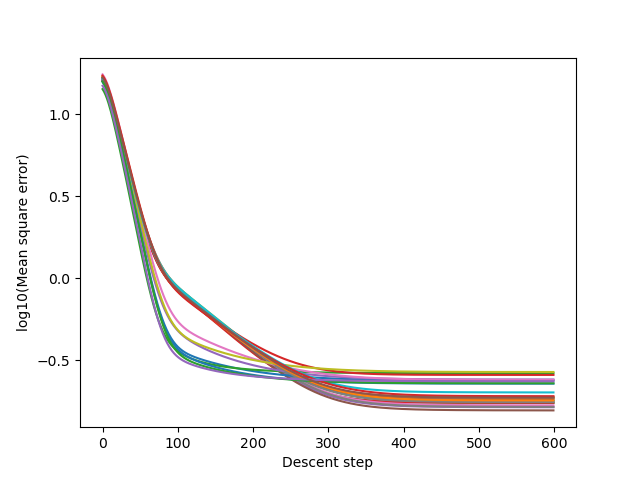

In [9]:
iq4 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg4)
iq4.quantify(**kwargs_dict)
res4 = iq4.compile_res()
iq4.plot_losses(log=True)

### Quantification 5

  0%|                                                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                          | 1/600 [00:00<02:56,  3.40it/s]

  2%|██▉                                                                                                                                       | 13/600 [00:00<00:14, 40.63it/s]

  4%|█████▌                                                                                                                                    | 24/600 [00:00<00:09, 61.35it/s]

  6%|████████                                                                                                                                  | 35/600 [00:00<00:07, 75.43it/s]

  8%|██████████▌                                                                                                                               | 46/600 [00:00<00:06, 85.26it/s]

 10%|█████████████                                                                                                                             | 57/600 [00:00<00:05, 92.51it/s]

 12%|███████████████▊                                                                                                                          | 69/600 [00:00<00:05, 98.35it/s]

 13%|██████████████████▎                                                                                                                      | 80/600 [00:01<00:05, 100.79it/s]

 15%|████████████████████▊                                                                                                                    | 91/600 [00:01<00:04, 103.20it/s]

 17%|███████████████████████                                                                                                                 | 102/600 [00:01<00:04, 103.72it/s]

 19%|█████████████████████████▊                                                                                                              | 114/600 [00:01<00:04, 107.70it/s]

 21%|████████████████████████████▎                                                                                                           | 125/600 [00:01<00:04, 108.11it/s]

 23%|██████████████████████████████▊                                                                                                         | 136/600 [00:01<00:04, 108.08it/s]

 24%|█████████████████████████████████▎                                                                                                      | 147/600 [00:01<00:04, 108.56it/s]

 26%|███████████████████████████████████▊                                                                                                    | 158/600 [00:01<00:04, 108.20it/s]

 28%|██████████████████████████████████████▎                                                                                                 | 169/600 [00:01<00:03, 108.58it/s]

 30%|█████████████████████████████████████████                                                                                               | 181/600 [00:01<00:03, 109.32it/s]

 32%|███████████████████████████████████████████▌                                                                                            | 192/600 [00:02<00:03, 107.99it/s]

 34%|██████████████████████████████████████████████                                                                                          | 203/600 [00:02<00:03, 107.70it/s]

 36%|████████████████████████████████████████████████▌                                                                                       | 214/600 [00:02<00:03, 107.19it/s]

 38%|███████████████████████████████████████████████████                                                                                     | 225/600 [00:02<00:03, 107.14it/s]

 39%|█████████████████████████████████████████████████████▍                                                                                  | 236/600 [00:02<00:03, 107.18it/s]

 41%|████████████████████████████████████████████████████████▍                                                                                | 247/600 [00:02<00:03, 99.81it/s]

 43%|██████████████████████████████████████████████████████████▍                                                                             | 258/600 [00:02<00:03, 102.07it/s]

 45%|████████████████████████████████████████████████████████████▉                                                                           | 269/600 [00:02<00:03, 104.26it/s]

 47%|███████████████████████████████████████████████████████████████▍                                                                        | 280/600 [00:02<00:03, 105.50it/s]

 49%|██████████████████████████████████████████████████████████████████▏                                                                     | 292/600 [00:03<00:02, 106.84it/s]

 50%|████████████████████████████████████████████████████████████████████▋                                                                   | 303/600 [00:03<00:02, 106.49it/s]

 52%|███████████████████████████████████████████████████████████████████████▏                                                                | 314/600 [00:03<00:02, 107.41it/s]

 54%|█████████████████████████████████████████████████████████████████████████▋                                                              | 325/600 [00:03<00:02, 106.75it/s]

 56%|████████████████████████████████████████████████████████████████████████████▏                                                           | 336/600 [00:03<00:02, 107.68it/s]

 58%|██████████████████████████████████████████████████████████████████████████████▋                                                         | 347/600 [00:03<00:02, 101.67it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▏                                                      | 358/600 [00:03<00:02, 100.03it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████▎                                                    | 369/600 [00:03<00:02, 99.44it/s]

 63%|██████████████████████████████████████████████████████████████████████████████████████▏                                                 | 380/600 [00:03<00:02, 100.65it/s]

 65%|█████████████████████████████████████████████████████████████████████████████████████████▎                                               | 391/600 [00:03<00:02, 96.55it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████▌                                             | 401/600 [00:04<00:02, 93.77it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 411/600 [00:04<00:02, 90.13it/s]

 70%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 422/600 [00:04<00:01, 94.87it/s]

 72%|███████████████████████████████████████████████████████████████████████████████████████████████████                                      | 434/600 [00:04<00:01, 99.37it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 445/600 [00:04<00:01, 100.84it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 456/600 [00:04<00:01, 101.80it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 467/600 [00:04<00:01, 103.20it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 478/600 [00:04<00:01, 104.56it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 489/600 [00:04<00:01, 105.44it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 500/600 [00:05<00:00, 104.89it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 511/600 [00:05<00:00, 106.02it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 522/600 [00:05<00:00, 106.48it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 533/600 [00:05<00:00, 106.67it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 544/600 [00:05<00:00, 106.22it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 555/600 [00:05<00:00, 105.25it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 566/600 [00:05<00:00, 106.27it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 577/600 [00:05<00:00, 107.01it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 588/600 [00:05<00:00, 106.66it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 599/600 [00:05<00:00, 107.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:05<00:00, 100.00it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

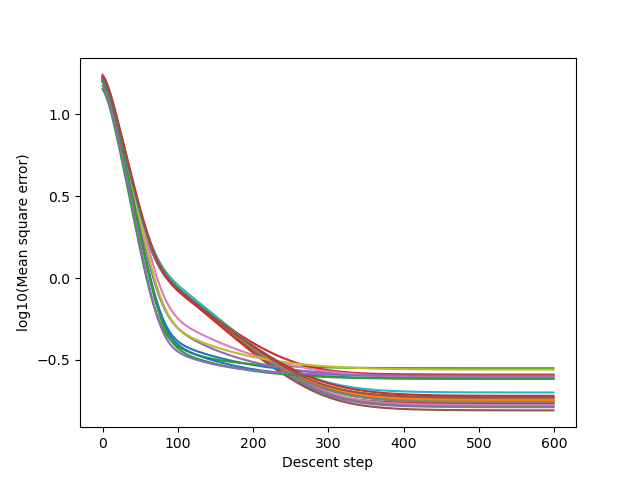

In [10]:
iq5 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg5)
iq5.quantify(**kwargs_dict)
res5 = iq5.compile_res()
iq5.plot_losses(log=True)

### Quantification 6

  0%|                                                                                                                                                   | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                          | 1/600 [00:00<02:58,  3.36it/s]

  2%|██▉                                                                                                                                       | 13/600 [00:00<00:14, 40.40it/s]

  4%|█████▌                                                                                                                                    | 24/600 [00:00<00:09, 61.03it/s]

  6%|████████▎                                                                                                                                 | 36/600 [00:00<00:07, 77.14it/s]

  8%|███████████▎                                                                                                                              | 49/600 [00:00<00:06, 91.24it/s]

 10%|█████████████▊                                                                                                                            | 60/600 [00:00<00:05, 96.72it/s]

 12%|████████████████▍                                                                                                                        | 72/600 [00:00<00:05, 101.60it/s]

 14%|██████████████████▉                                                                                                                      | 83/600 [00:01<00:04, 103.59it/s]

 16%|█████████████████████▍                                                                                                                   | 94/600 [00:01<00:04, 104.87it/s]

 18%|███████████████████████▊                                                                                                                | 105/600 [00:01<00:04, 105.46it/s]

 19%|██████████████████████████▎                                                                                                             | 116/600 [00:01<00:04, 105.99it/s]

 21%|████████████████████████████▊                                                                                                           | 127/600 [00:01<00:04, 106.62it/s]

 23%|███████████████████████████████▎                                                                                                        | 138/600 [00:01<00:04, 105.38it/s]

 25%|██████████████████████████████████                                                                                                      | 150/600 [00:01<00:04, 106.93it/s]

 27%|████████████████████████████████████▍                                                                                                   | 161/600 [00:01<00:04, 106.36it/s]

 29%|██████████████████████████████████████▉                                                                                                 | 172/600 [00:01<00:03, 107.39it/s]

 30%|█████████████████████████████████████████▍                                                                                              | 183/600 [00:01<00:03, 107.92it/s]

 32%|███████████████████████████████████████████▉                                                                                            | 194/600 [00:02<00:03, 107.59it/s]

 34%|██████████████████████████████████████████████▍                                                                                         | 205/600 [00:02<00:03, 106.76it/s]

 36%|████████████████████████████████████████████████▉                                                                                       | 216/600 [00:02<00:03, 106.90it/s]

 38%|███████████████████████████████████████████████████▋                                                                                    | 228/600 [00:02<00:03, 108.42it/s]

 40%|██████████████████████████████████████████████████████▏                                                                                 | 239/600 [00:02<00:03, 108.77it/s]

 42%|████████████████████████████████████████████████████████▉                                                                               | 251/600 [00:02<00:03, 109.40it/s]

 44%|███████████████████████████████████████████████████████████▍                                                                            | 262/600 [00:02<00:03, 109.33it/s]

 46%|█████████████████████████████████████████████████████████████▉                                                                          | 273/600 [00:02<00:03, 107.41it/s]

 47%|████████████████████████████████████████████████████████████████▎                                                                       | 284/600 [00:02<00:03, 101.53it/s]

 49%|██████████████████████████████████████████████████████████████████▊                                                                     | 295/600 [00:03<00:03, 101.21it/s]

 51%|█████████████████████████████████████████████████████████████████████▎                                                                  | 306/600 [00:03<00:02, 102.33it/s]

 53%|███████████████████████████████████████████████████████████████████████▊                                                                | 317/600 [00:03<00:02, 103.18it/s]

 55%|██████████████████████████████████████████████████████████████████████████▌                                                             | 329/600 [00:03<00:02, 105.77it/s]

 57%|█████████████████████████████████████████████████████████████████████████████                                                           | 340/600 [00:03<00:02, 106.20it/s]

 58%|███████████████████████████████████████████████████████████████████████████████▌                                                        | 351/600 [00:03<00:02, 106.02it/s]

 60%|██████████████████████████████████████████████████████████████████████████████████                                                      | 362/600 [00:03<00:02, 106.97it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████▌                                                   | 373/600 [00:03<00:02, 107.10it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████                                                 | 384/600 [00:03<00:02, 107.86it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████▌                                              | 395/600 [00:03<00:01, 108.23it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████                                            | 406/600 [00:04<00:01, 107.14it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 417/600 [00:04<00:01, 107.69it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████                                       | 428/600 [00:04<00:01, 107.83it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 440/600 [00:04<00:01, 109.39it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 451/600 [00:04<00:01, 109.57it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 463/600 [00:04<00:01, 109.75it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 474/600 [00:04<00:01, 109.58it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 485/600 [00:04<00:01, 109.64it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 496/600 [00:04<00:00, 108.86it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 508/600 [00:04<00:00, 109.51it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 519/600 [00:05<00:00, 108.87it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 530/600 [00:05<00:00, 108.92it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 542/600 [00:05<00:00, 109.23it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 553/600 [00:05<00:00, 108.16it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 564/600 [00:05<00:00, 107.84it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 576/600 [00:05<00:00, 109.05it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 587/600 [00:05<00:00, 109.10it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 598/600 [00:05<00:00, 109.25it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:05<00:00, 102.77it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

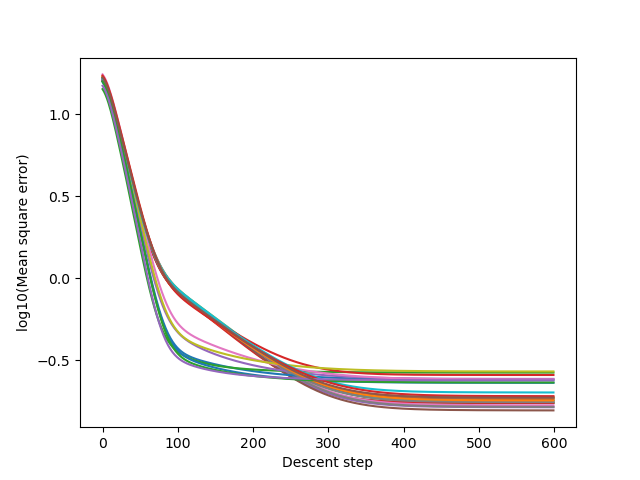

In [11]:
iq6 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg6)
iq6.quantify(**kwargs_dict)
res6 = iq6.compile_res()
iq6.plot_losses(log=True)

### Get calibrations

In [12]:
def calculate_calibration(res):
    mems = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Membrane signal']))
    cyts = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Cytoplasmic signal']))
    pre_post = [p.split('/')[-1] for p in paths]
    embryos = [p.split('/')[-2] for p in paths]
    lines = [p.split('/')[-3].split('_')[1] for p in paths]

    df_dict = {'Line': lines, 'Embryo': embryos, 'Exposure': pre_post, 'Membrane': mems, 'Cytoplasm': cyts}
    df = pd.DataFrame(df_dict)

    pre = df.groupby(['Line', 'Embryo']).last()
    post = df.groupby(['Line', 'Embryo']).first()
    df = pd.DataFrame({'mem_pre': pre.Membrane, 
                       'mem_post': post.Membrane, 'cyt_pre': pre.Cytoplasm, 
                       'cyt_post': post.Cytoplasm})
    df.to_csv('temp.csv')
    df = pd.read_csv('temp.csv')
    os.remove('temp.csv')
    return df

In [13]:
df0 = calculate_calibration(res0)
df1 = calculate_calibration(res1)
df2 = calculate_calibration(res2)
df3 = calculate_calibration(res3)
df4 = calculate_calibration(res4)
df5 = calculate_calibration(res5)
df6 = calculate_calibration(res6)

In [14]:
# Mean and standard deviation for all the calibrations

def calculate_mean_std(df):
    c = df[df.Line == 'sv2061'].apply(lambda x: ((x.cyt_pre - x.cyt_post) / (x.mem_post - x.mem_pre)) / 0.174, axis=1)
    return np.mean(c), np.std(c)

means, stds = zip(*[calculate_mean_std(df) for df in [df0, df1, df2, df3, df4, df5, df6]])
print(means[-1], stds[-1])
np.savetxt('../../data/calibration_constants.txt', means)

3.105838399548696 0.28318538814575517


In [15]:
# Saving full results for calibration 6 (will use later in a figure)
df6.to_csv('../../data/calibration_quantification6.csv')